# **Knowing the Data-**

In [ ]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
df= pd.read_excel('/content/data_airline_reviews.xlsx')

In [ ]:
# Dataset First View-
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
# Dataset Shape-
df.shape

(131895, 17)

In [ ]:
# Dataset Information-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
# Duplicate values-

df.duplicated().sum()

np.int64(70711)

In [ ]:
# Missing / Null Values-
df.isnull().sum()

,0
airline,65948
overall,67878
author,65948
review_date,65948
customer_review,65948
aircraft,112177
traveller_type,92140
cabin,68592
route,92169
date_flown,92262


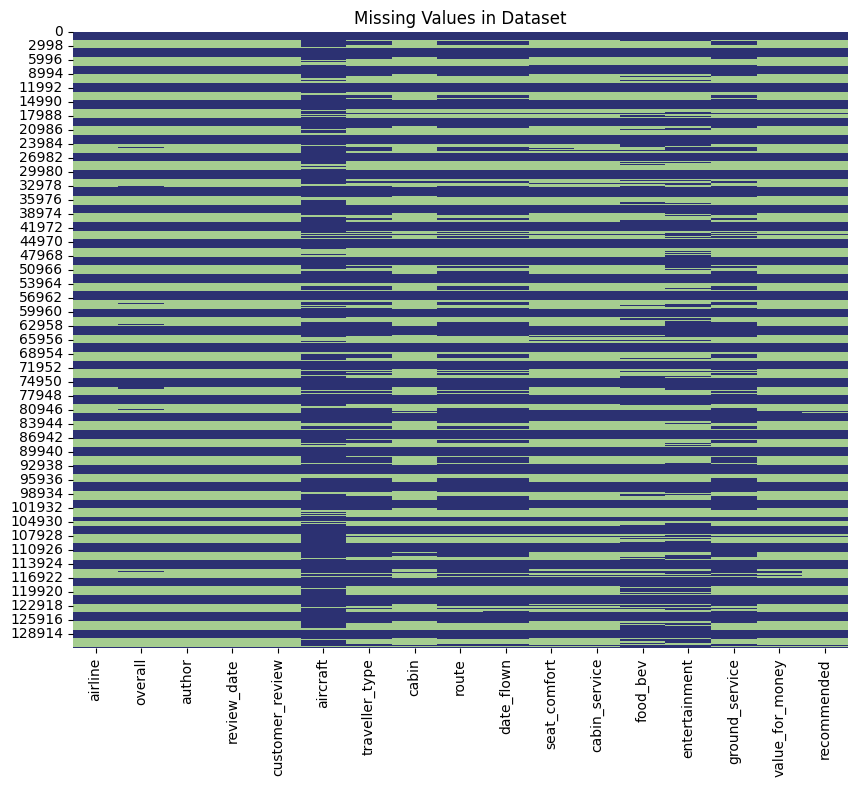

In [ ]:
# Visualizing Missing Values-

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, cmap='crest')
plt.title("Missing Values in Dataset")
plt.show()

# **Understanding Variables-**

In [ ]:
# Columns in Dataset-
list(df.columns)

['airline',
 'overall',
 'author',
 'review_date',
 'customer_review',
 'aircraft',
 'traveller_type',
 'cabin',
 'route',
 'date_flown',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'entertainment',
 'ground_service',
 'value_for_money',
 'recommended']

In [ ]:
# Described Dataset-
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


In [ ]:
# Unique values in each columns-
print("-----------------------------------------------------------")
print("Unique Values")
print("-----------------------------------------------------------")
for i in df.columns.tolist():
  print("Number of unique values in column",i,"is",df[i].nunique())

-----------------------------------------------------------
Unique Values
-----------------------------------------------------------
Number of unique values in column airline is 81
Number of unique values in column overall is 10
Number of unique values in column author is 44069
Number of unique values in column review_date is 3015
Number of unique values in column customer_review is 61172
Number of unique values in column aircraft is 2088
Number of unique values in column traveller_type is 4
Number of unique values in column cabin is 4
Number of unique values in column route is 24549
Number of unique values in column date_flown is 63
Number of unique values in column seat_comfort is 5
Number of unique values in column cabin_service is 5
Number of unique values in column food_bev is 5
Number of unique values in column entertainment is 5
Number of unique values in column ground_service is 5
Number of unique values in column value_for_money is 5
Number of unique values in column recommen

# **Data Wrangling-**

In [ ]:
# Dropping duplicate values as there are so many duplicate and blank rows-
df.drop_duplicates(inplace=True)
# Resetting index after dropping blank and duplicate rows
df.reset_index(drop=True, inplace=True)
df.shape

(61184, 17)

In [ ]:
# Checking Null values and sorting it in decending-
df.isnull().sum().sort_values(ascending=False)

,0
aircraft,42696
ground_service,24015
date_flown,23750
route,23671
traveller_type,23644
entertainment,20954
food_bev,12843
seat_comfort,4973
cabin_service,4944
cabin,2479


In [ ]:
# Extracting sentiment scores from column customer_review-

from textblob import TextBlob

df['customer_review'] = df['customer_review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

""" Using Sentiment score for column 'customer_review' we can use it further in our classification model """

" Using Sentiment score for column 'customer_review' we can use it further in our classification model "

In [ ]:
# Dropping Unecessary Columns because they add no values to our model-

df.drop(columns=(['author','route']), axis=1, inplace=True)

# Dropping column 'aircraft' because it contains almost 70% NaN values-

df.drop(columns=(['aircraft']), axis=1, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
ground_service,24015
date_flown,23750
traveller_type,23644
entertainment,20954
food_bev,12843
seat_comfort,4973
cabin_service,4944
cabin,2479
value_for_money,1857
overall,1783


In [ ]:
df.dropna(subset=(['ground_service','entertainment']),inplace=True)
df.isnull().sum().sort_values(ascending=False)

,0
food_bev,782
cabin,13
date_flown,10
traveller_type,2
overall,1
seat_comfort,1
cabin_service,1
review_date,0
airline,0
customer_review,0


In [ ]:
df['food_bev'].fillna(df['food_bev'].mean(),inplace=True)

<ipython-input-174-e4afeae87b47>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['food_bev'].fillna(df['food_bev'].mean(),inplace=True)


In [ ]:
# Dropping all the remaining Null values now-

df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
airline,0
overall,0
review_date,0
customer_review,0
traveller_type,0
cabin,0
date_flown,0
seat_comfort,0
cabin_service,0
food_bev,0


In [ ]:
df.reset_index(drop=True, inplace= True)
df.shape

(23606, 14)

# **Data Manipulation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23606 entries, 0 to 23605
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          23606 non-null  object 
 1   overall          23606 non-null  float64
 2   review_date      23606 non-null  object 
 3   customer_review  23606 non-null  float64
 4   traveller_type   23606 non-null  object 
 5   cabin            23606 non-null  object 
 6   date_flown       23606 non-null  object 
 7   seat_comfort     23606 non-null  float64
 8   cabin_service    23606 non-null  float64
 9   food_bev         23606 non-null  float64
 10  entertainment    23606 non-null  float64
 11  ground_service   23606 non-null  float64
 12  value_for_money  23606 non-null  float64
 13  recommended      23606 non-null  object 
dtypes: float64(8), object(6)
memory usage: 2.5+ MB




* --  Here we can see that dtype of many variables are not correct, so we will change it accordingly



In [ ]:
d_type={'overall':'int8', 'review_date':'datetime64[ns]','seat_comfort':'int8','cabin_service':'int8','food_bev':'int8'
          ,'entertainment':'int8','ground_service':'int8','value_for_money':'int8'}


for i,j in d_type.items():
  df[i]=df[i].astype(j)

In [ ]:
df.head()

,airline,overall,review_date,customer_review,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7,2019-05-08,0.260263,Business,Economy Class,2019-05-01 00:00:00,4,5,4,4,2,4,yes
1,Turkish Airlines,2,2019-05-07,0.116667,Family Leisure,Economy Class,2019-05-01 00:00:00,4,1,1,1,1,1,no
2,Turkish Airlines,3,2019-05-07,0.019803,Business,Economy Class,2019-05-01 00:00:00,1,4,1,3,1,2,no
3,Turkish Airlines,10,2019-05-06,0.345238,Solo Leisure,Economy Class,April 2019,4,5,5,5,5,5,yes
4,Turkish Airlines,1,2019-05-06,0.191667,Solo Leisure,Economy Class,2019-05-01 00:00:00,1,1,1,1,1,1,no


In [ ]:
# Now we can see that the columns date_flown is in object dtype we will change it to datetime-

df['date_flown']=pd.to_datetime(df['date_flown'], errors= 'coerce').dt.date   ##.dt.date removes timestamp(which was 00:00:00 in all cells)

In [ ]:
# Renaming some columns for better understanding-

rename_col={'overall':'overall_rating','date_flown':'departure'}
df.rename(columns=rename_col, inplace=True)

In [ ]:
# Checking info again-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23606 entries, 0 to 23605
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          23606 non-null  object        
 1   overall_rating   23606 non-null  int8          
 2   review_date      23606 non-null  datetime64[ns]
 3   customer_review  23606 non-null  float64       
 4   traveller_type   23606 non-null  object        
 5   cabin            23606 non-null  object        
 6   departure        23606 non-null  object        
 7   seat_comfort     23606 non-null  int8          
 8   cabin_service    23606 non-null  int8          
 9   food_bev         23606 non-null  int8          
 10  entertainment    23606 non-null  int8          
 11  ground_service   23606 non-null  int8          
 12  value_for_money  23606 non-null  int8          
 13  recommended      23606 non-null  object        
dtypes: datetime64[ns](1), float64(1), int8

In [ ]:
df.head()

,airline,overall_rating,review_date,customer_review,traveller_type,cabin,departure,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7,2019-05-08,0.260263,Business,Economy Class,2019-05-01,4,5,4,4,2,4,yes
1,Turkish Airlines,2,2019-05-07,0.116667,Family Leisure,Economy Class,2019-05-01,4,1,1,1,1,1,no
2,Turkish Airlines,3,2019-05-07,0.019803,Business,Economy Class,2019-05-01,1,4,1,3,1,2,no
3,Turkish Airlines,10,2019-05-06,0.345238,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes
4,Turkish Airlines,1,2019-05-06,0.191667,Solo Leisure,Economy Class,2019-05-01,1,1,1,1,1,1,no


- Converted **date columns** to `datetime` format as they were initially in **object** datatype.  
- Transformed **rating columns** from `float` to `int` since all ratings were in **integer values** only.  
- The `date_flown` column contained **timestamps** along with dates, so we **removed the timestamp** and converted it into a proper **date format** (`datetime` datatype).  
- Renamed **`overall` → `overall_rating`** and **`date_flown` → `departure_date`** for better clarity and understanding.  

# **Data Visualization**

**1) Bar Chart for comparing top airlines-**

<ipython-input-185-fc87b64adb66>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=air_cnt['count'], x=air_cnt['airline_name'],palette='Set1')


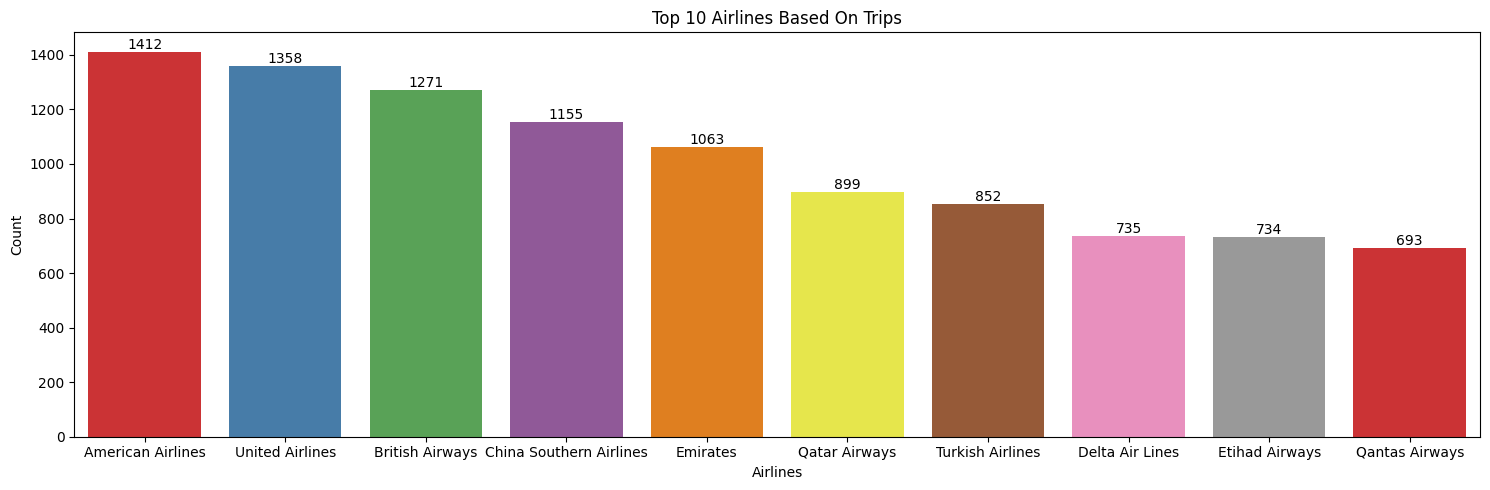

In [ ]:
plt.figure(figsize=(15,5))

# Get top 10 airlines and reset index
air_cnt = df['airline'].value_counts().sort_values(ascending=False).head(10).reset_index()
air_cnt.columns = ['airline_name', 'count']

# Plot the bar chart
ax = sns.barplot(y=air_cnt['count'], x=air_cnt['airline_name'],palette='Set1')
plt.title("Top 10 Airlines Based On Trips")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.tight_layout()

# Add labels to bars
for num in ax.containers:
    ax.bar_label(num)

plt.show()

**2) Pie Chart for showing distribution of different cabin classes preffered by passengers-**

([<matplotlib.patches.Wedge at 0x7aba550e1b10>,
 [Text(-1.0817493905708961, -0.19954512271537717, 'Economy Class'),
  Text(1.0969864172558772, -0.08136830068346301, 'Business Class'),
  Text(0.9360447317544359, 0.782445052482771, 'Premium Economy'),
  Text(0.7533212550951246, 1.0594843493992285, 'First Class')],
 [Text(-0.5900451221295797, -0.10884279420838754, '72.47%'),
  Text(0.5983562275941148, -0.04438270946370709, '19.36%'),
  Text(0.5524198416911424, 0.46177085064556966, '5.16%'),
  Text(0.46358231082776896, 0.6519903688610637, '3.01%')])

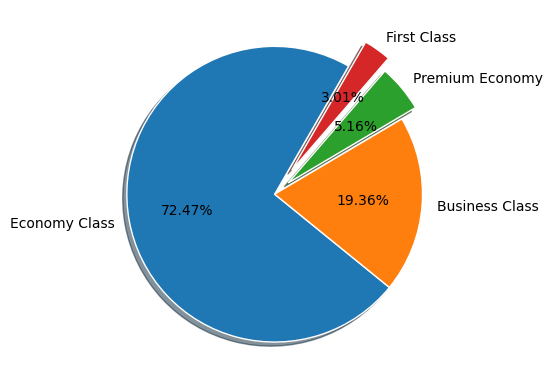

In [ ]:
cabin_cnt= df['cabin'].value_counts().reset_index()

plt.pie(cabin_cnt['count'],labels= cabin_cnt['cabin'],autopct='%1.2f%%',startangle=60,explode=[0,0,0.12,0.2], textprops={'fontsize':10}, shadow=True, wedgeprops={'edgecolor':'white'})

**3) Bar-Chart for comparison of traveller type-**

<ipython-input-187-02abfcd61186>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=traveltype_cnt['traveller_type'],y=traveltype_cnt['count'],palette='Blues_r')


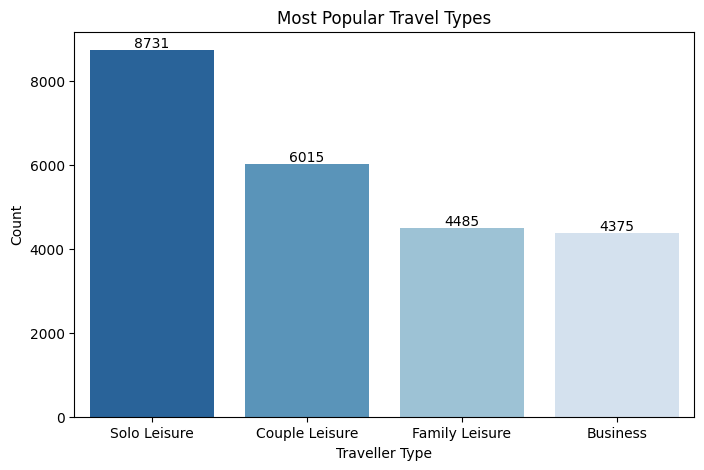

In [ ]:
traveltype_cnt= df['traveller_type'].value_counts().reset_index()

plt.figure(figsize=(8,5))
ax= sns.barplot(x=traveltype_cnt['traveller_type'],y=traveltype_cnt['count'],palette='Blues_r')
plt.xlabel("Traveller Type")
plt.ylabel("Count")
plt.title("Most Popular Travel Types")
for i in ax.containers:
  ax.bar_label(i)
plt.show()

**4) Chart for Comparing Ratings of food/Bev & Entertainment in all Cabin Types-**

In [ ]:
cabin_fbe= df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
cabin_fbe

,cabin,food_bev,entertainment
0,Business Class,3.509517,3.406913
1,Economy Class,2.625146,2.688859
2,First Class,3.295775,3.284507
3,Premium Economy,2.942482,3.123254


<Figure size 1200x1200 with 0 Axes>

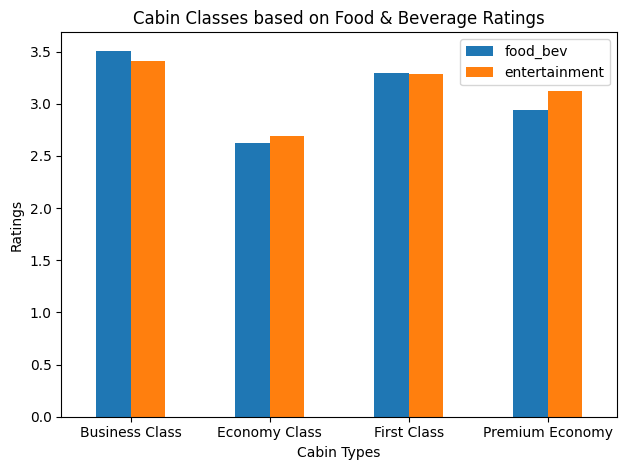

In [ ]:
plt.figure(figsize=(12,12))
cabin_fbe.plot(x='cabin',y=['food_bev','entertainment'], kind='bar')
plt.xlabel("Cabin Types")
plt.ylabel("Ratings")
plt.title("Cabin Classes based on Food & Beverage Ratings")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**5) Distribution of different types of Ratings-**

<ipython-input-190-2478325e6b6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_melted,x='Rating Category', y='Rating',palette='Set2')


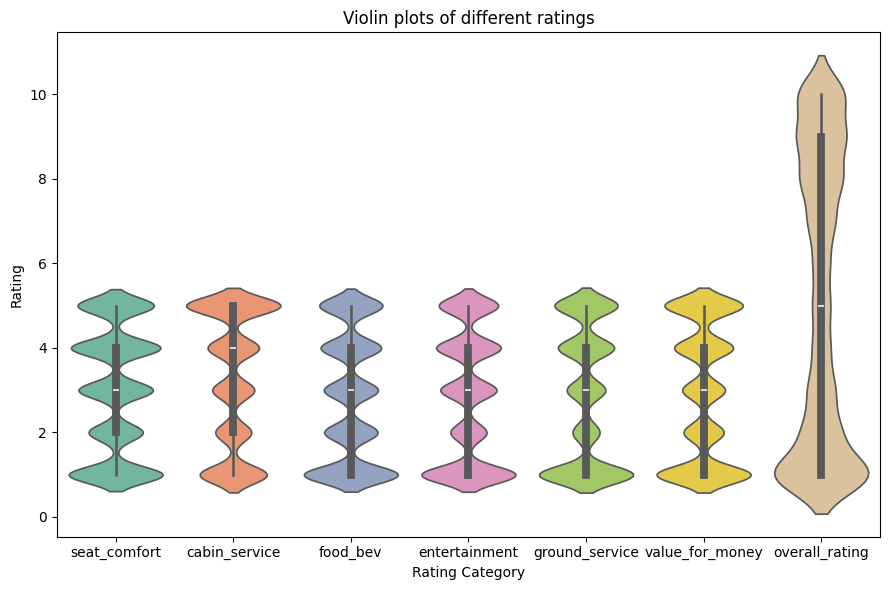

In [ ]:
columns = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money','overall_rating']
df_melted= df.melt(value_vars=columns,var_name='Rating Category',value_name='Rating')


plt.figure(figsize=(9,6))
sns.violinplot(data=df_melted,x='Rating Category', y='Rating',palette='Set2')
plt.title("Violin plots of different ratings")
plt.tight_layout()
plt.show()

**6) Chart for top rated airlines-**

In [ ]:
airl_rating= df.groupby(df['airline'])['overall_rating'].mean().sort_values(ascending=False).head(10).reset_index()
airl_rating

,airline,overall_rating
0,Aegean Airlines,8.777778
1,EVA Air,8.461538
2,ANA All Nippon Airways,8.418079
3,Garuda Indonesia,8.179245
4,China Southern Airlines,8.117749
5,Qatar Airways,7.869855
6,Asiana Airlines,7.672000
7,Singapore Airlines,7.547458
8,Thai Smile Airways,7.500000
9,Cathay Pacific Airways,7.076583


<ipython-input-192-d91dd5a6be23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=airl_rating, x='overall_rating',y='airline', palette='Set2')


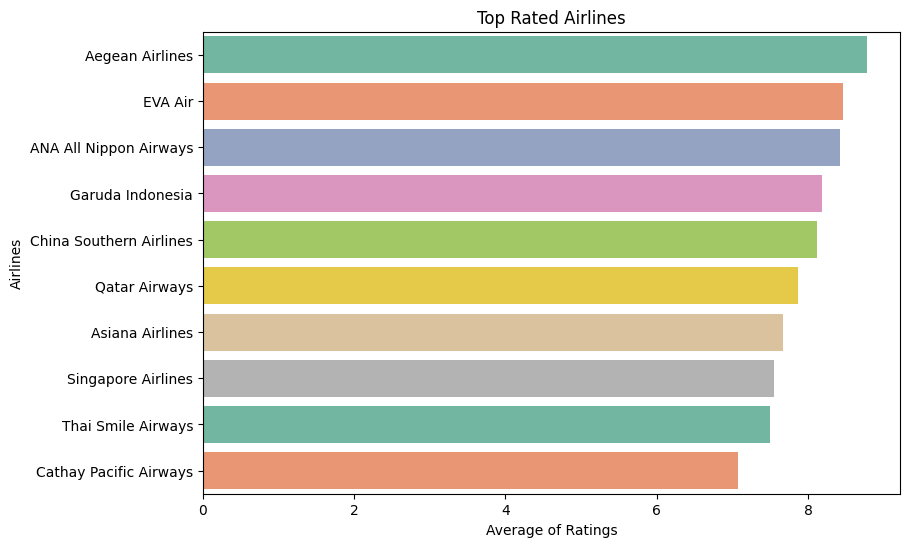

In [ ]:
plt.figure(figsize=(9,6))
ax=sns.barplot(data=airl_rating, x='overall_rating',y='airline', palette='Set2')
plt.xlabel("Average of Ratings")
plt.ylabel("Airlines")
plt.title("Top Rated Airlines")
plt.show()

**7) Top 10 Airlines with respect to Value_for_money-**

In [ ]:
airl_vfm= df.groupby(df['airline'])['value_for_money'].mean().sort_values(ascending=False).head(10).reset_index()
airl_vfm

,airline,value_for_money
0,EVA Air,4.442308
1,China Southern Airlines,4.397403
2,Aegean Airlines,4.350427
3,Garuda Indonesia,4.292453
4,ANA All Nippon Airways,4.288136
5,Qatar Airways,4.180200
6,Asiana Airlines,4.128000
7,Thai Smile Airways,4.000000
8,Singapore Airlines,3.828814
9,Korean Air,3.786164


<ipython-input-194-42499ecf13b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=airl_vfm, y='value_for_money',x='airline', palette='viridis')


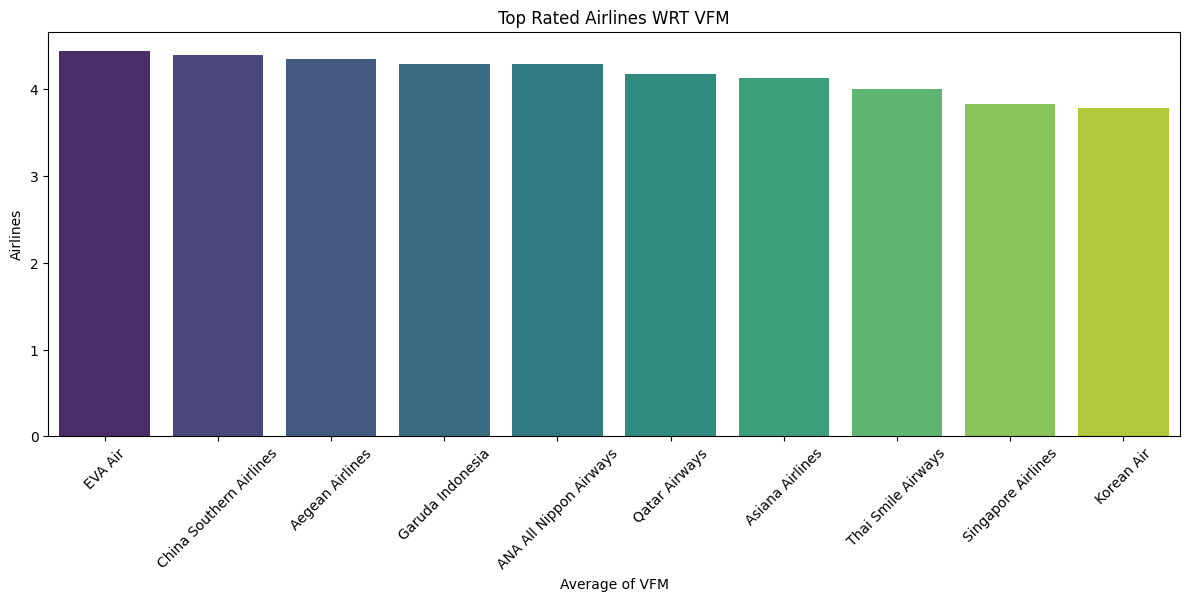

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=airl_vfm, y='value_for_money',x='airline', palette='viridis')
plt.xlabel("Average of VFM")
plt.ylabel("Airlines")
plt.title("Top Rated Airlines WRT VFM")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**8) Histogram for the distribution of Overall_rating-**

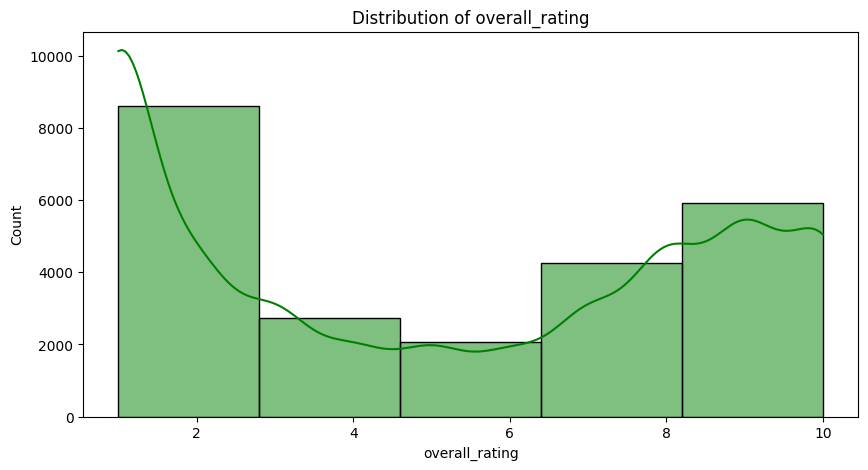

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['overall_rating'],kde = True, bins=5,color='g')
plt.title("Distribution of overall_rating")
plt.show()

**9) Box plot for cabin_service in different cabins-**

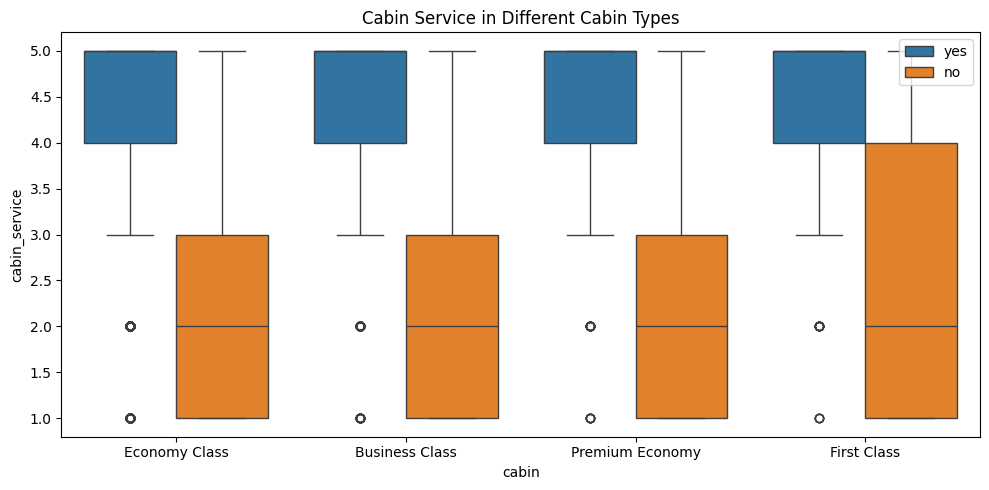

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cabin',y='cabin_service',hue='recommended')
plt.title("Cabin Service in Different Cabin Types")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**10) Bar chart for number of reviews per month-**

In [ ]:
df['month_name']=df['review_date'].dt.strftime('%B')
df['month']=df['review_date'].dt.month
review_vc= df[['month','month_name']].value_counts().reset_index().sort_values(by='month')

review_vc

,month,month_name,count
0,1,January,2401
10,2,February,1721
9,3,March,1834
7,4,April,1852
11,5,May,1526
8,6,June,1846
1,7,July,2184
2,8,August,2170
5,9,September,2014
3,10,October,2060


<ipython-input-198-8e063ee1d1e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=review_vc,x='month_name',y='count',palette='Set3')


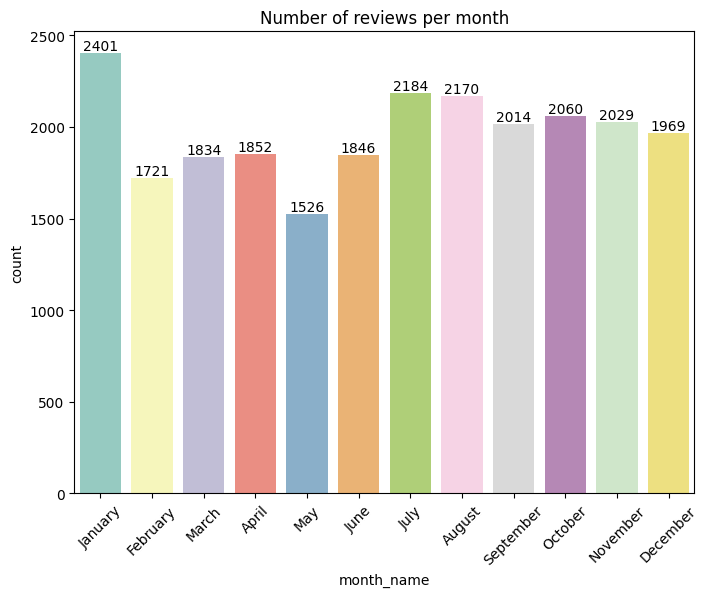

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.barplot(data=review_vc,x='month_name',y='count',palette='Set3')
for i in ax.containers:
  ax.bar_label(i)
plt.title("Number of reviews per month")
plt.xticks(rotation=45)
plt.show()

**11) Grouped Bar chart for comparing overall_rating v/s cabin type**

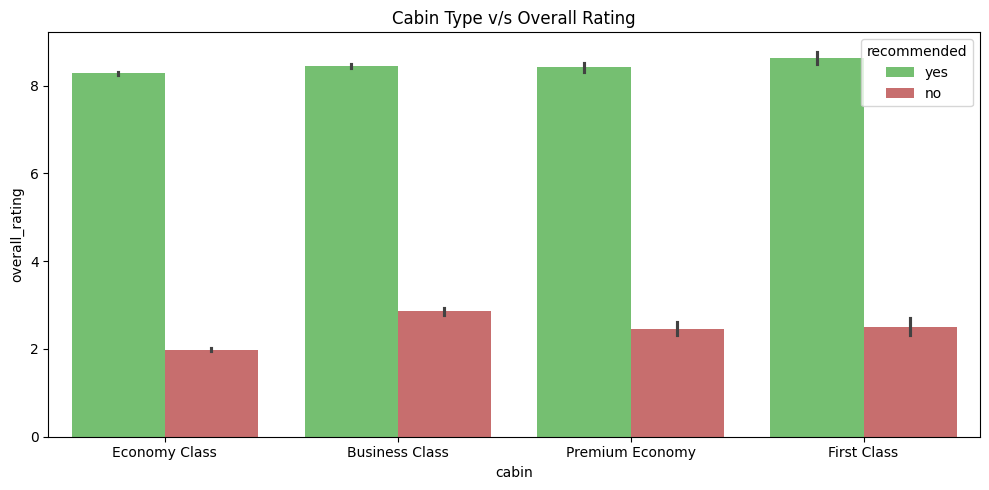

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='cabin',y='overall_rating', hue= 'recommended', palette=['#6ACC64','#D65F5F'])
plt.title("Cabin Type v/s Overall Rating")
plt.tight_layout()
plt.show()

**12) Correlation Heatmap-**

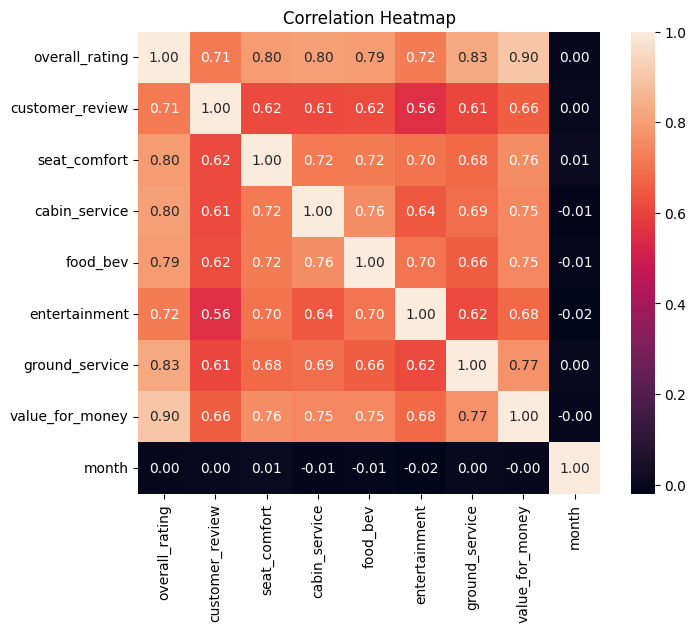

In [ ]:
plt.figure(figsize=(8,6))
numeric_df= df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='rocket', square=True)
plt.title("Correlation Heatmap")
plt.show()

**13) Pair-plot**

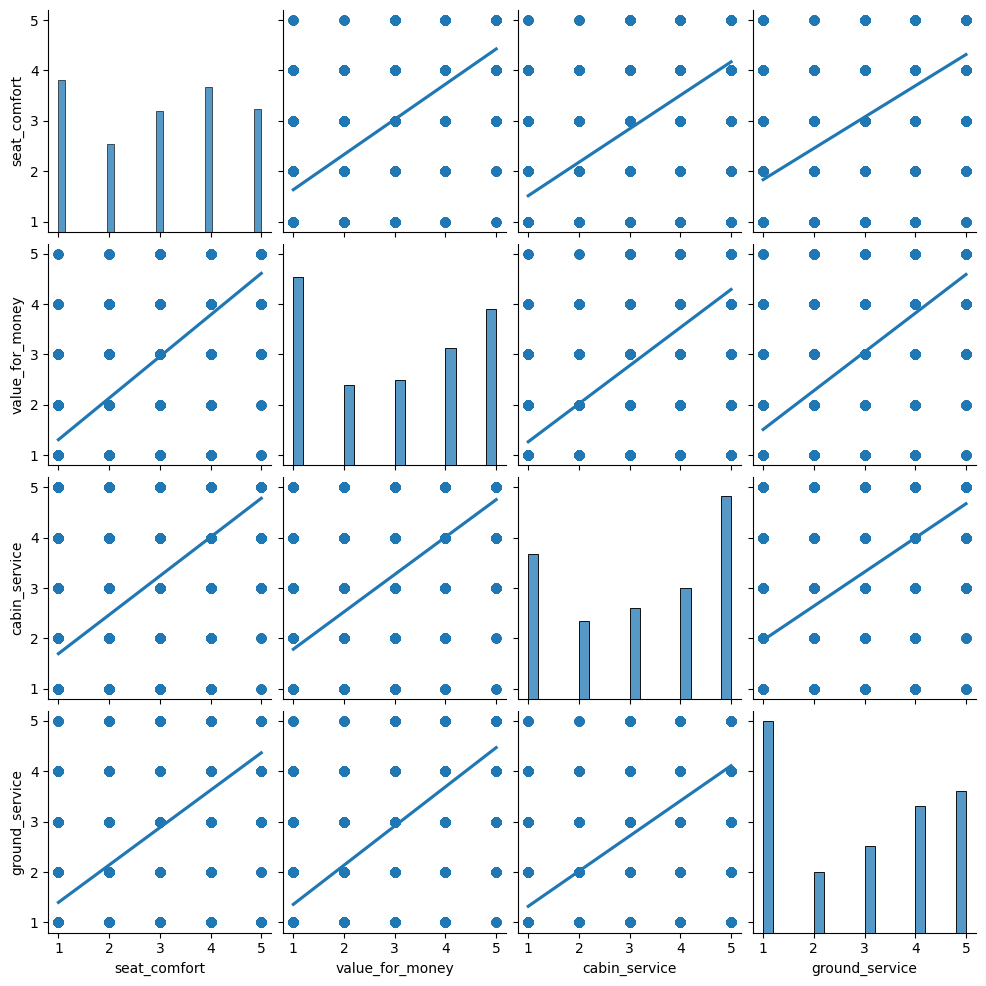

In [ ]:
column_name = [ 'seat_comfort','value_for_money','cabin_service','ground_service']
pairplot_data = df[column_name]
sns.pairplot(pairplot_data,kind = 'reg')
plt.show()

# **Feature Engineering-**

**Encoding-**

In [ ]:
# Encoding Target Variable-
le= LabelEncoder()
df['recommended']=le.fit_transform(df['recommended'])

In [ ]:
# Encoding Cabin Type-

cabin_type= df['cabin'].unique()
cabin_type

mapping={'Economy Class': 1 ,'Premium Economy': 2 ,'Business Class': 3 ,'First Class': 4 }

df['cabin']= df['cabin'].map(mapping)

In [ ]:
# Encoding Traveller Type-

trav_ty= df['traveller_type'].unique()
trav_ty

ohe= ce.OneHotEncoder(cols=['traveller_type'],use_cat_names=True)
df = ohe.fit_transform(df)

In [ ]:
df.head()

,airline,overall_rating,review_date,customer_review,traveller_type_Business,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Couple Leisure,cabin,departure,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,month_name,month
0,Turkish Airlines,7,2019-05-08,0.260263,1,0,0,0,1,2019-05-01,4,5,4,4,2,4,1,May,5
1,Turkish Airlines,2,2019-05-07,0.116667,0,1,0,0,1,2019-05-01,4,1,1,1,1,1,0,May,5
2,Turkish Airlines,3,2019-05-07,0.019803,1,0,0,0,1,2019-05-01,1,4,1,3,1,2,0,May,5
3,Turkish Airlines,10,2019-05-06,0.345238,0,0,1,0,1,2019-04-01,4,5,5,5,5,5,1,May,5
4,Turkish Airlines,1,2019-05-06,0.191667,0,0,1,0,1,2019-05-01,1,1,1,1,1,1,0,May,5


# **Feature Manipulation & Selection**

In [ ]:
# Dropping Unecessary column which adds no values to the model-
"""
-- Columns to drop-
i) review_date - It adds no value.
ii) departure - Also a date column and adds no value.
iii) airline - Adds no value.
iv) month - Created for visualization purpose.
v) month_name - Same as above.

"""


df.drop(['review_date','departure','airline','month','month_name'],axis=1, inplace= True)

In [ ]:
df.head()

,overall_rating,customer_review,traveller_type_Business,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Couple Leisure,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,7,0.260263,1,0,0,0,1,4,5,4,4,2,4,1
1,2,0.116667,0,1,0,0,1,4,1,1,1,1,1,0
2,3,0.019803,1,0,0,0,1,1,4,1,3,1,2,0
3,10,0.345238,0,0,1,0,1,4,5,5,5,5,5,1
4,1,0.191667,0,0,1,0,1,1,1,1,1,1,1,0


In [ ]:
# Checking correlation of the dataset-
df.corr()

,overall_rating,customer_review,traveller_type_Business,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Couple Leisure,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
overall_rating,1.000000,0.713816,-0.031337,-0.039396,0.109192,-0.057563,0.233264,0.795892,0.802345,0.793299,0.720355,0.826567,0.899440,0.899921
customer_review,0.713816,1.000000,-0.017838,-0.017457,0.074678,-0.051113,0.183229,0.615913,0.614661,0.621616,0.556362,0.609321,0.656042,0.668189
traveller_type_Business,-0.031337,-0.017838,1.000000,-0.231001,-0.365419,-0.278908,0.201845,-0.010829,-0.023353,-0.028317,-0.037176,-0.023980,-0.047114,-0.024958
traveller_type_Family Leisure,-0.039396,-0.017457,-0.231001,1.000000,-0.371047,-0.283203,-0.124594,-0.028523,-0.037813,-0.034492,-0.017355,-0.035149,-0.035384,-0.036072
traveller_type_Solo Leisure,0.109192,0.074678,-0.365419,-0.371047,1.000000,-0.447998,-0.057788,0.094784,0.100652,0.096926,0.074056,0.092936,0.109364,0.111446
traveller_type_Couple Leisure,-0.057563,-0.051113,-0.278908,-0.283203,-0.447998,1.000000,-0.003797,-0.069675,-0.056646,-0.051080,-0.033271,-0.049936,-0.047296,-0.068740
cabin,0.233264,0.183229,0.201845,-0.124594,-0.057788,-0.003797,1.000000,0.268436,0.218071,0.227989,0.189834,0.210488,0.186135,0.203489
seat_comfort,0.795892,0.615913,-0.010829,-0.028523,0.094784,-0.069675,0.268436,1.000000,0.715203,0.720664,0.698042,0.678297,0.758516,0.725536
cabin_service,0.802345,0.614661,-0.023353,-0.037813,0.100652,-0.056646,0.218071,0.715203,1.000000,0.759962,0.643760,0.686711,0.748290,0.742769
food_bev,0.793299,0.621616,-0.028317,-0.034492,0.096926,-0.051080,0.227989,0.720664,0.759962,1.000000,0.704976,0.655019,0.747458,0.729327


In [ ]:
# Dropping column "overall_rating" to avoid data leakage-
df.drop(["overall_rating"],axis=1,inplace= True)

In [ ]:
# Separating X & y labels-
y= df['recommended']
X= df.drop(['recommended'], axis=1)

In [ ]:
# Feature selection-

from sklearn.ensemble import ExtraTreesClassifier
fs_model= ExtraTreesClassifier()
fs_model.fit(X,y)
print(fs_model.feature_importances_)

[0.09172056 0.00466667 0.00417106 0.00561682 0.00471456 0.01481807
 0.11531505 0.15017814 0.10775623 0.05819825 0.19394849 0.2488961 ]


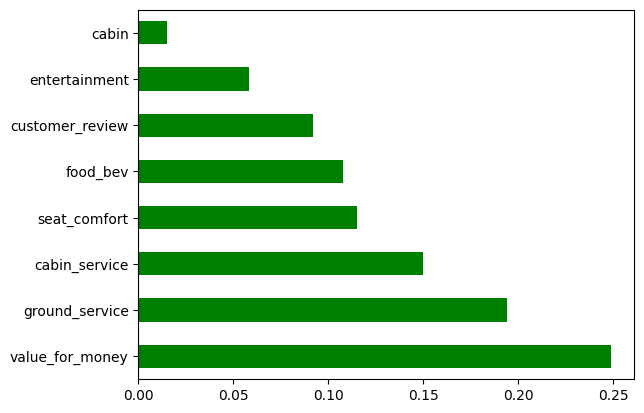

In [ ]:
# Plotting variables according to importance-
feat_imp= pd.Series(fs_model.feature_importances_, index=X.columns)
feat_imp.nlargest(8).plot(kind="barh", color='g')
plt.show()

In [ ]:
# Updating X-

selected_feat= ['cabin','entertainment','customer_review','seat_comfort','food_bev','ground_service','cabin_service','value_for_money']

X= X[selected_feat]

In [ ]:
X.head()

,cabin,entertainment,customer_review,seat_comfort,food_bev,ground_service,cabin_service,value_for_money
0,1,4,0.260263,4,4,2,5,4
1,1,1,0.116667,4,1,1,1,1
2,1,3,0.019803,1,1,1,4,2
3,1,5,0.345238,4,5,5,5,5
4,1,1,0.191667,1,1,1,1,1


# **Training Model**



**Splitting Data into Train and Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=18)

In [ ]:
# Train & Evaluate Models
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize Models

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs) if y_probs is not None else "N/A"

    print(f"o--> {name}:")
    print("-" * 70)
    print(f"   ✅ Accuracy: {accuracy:.4f}")
    print(f"   🎯 ROC AUC: {roc_auc}")
    print(classification_report(y_test, y_pred))
    print("-" * 70)

o--> Logistic Regression:
----------------------------------------------------------------------
   ✅ Accuracy: 0.9507
   🎯 ROC AUC: 0.9882537005297042
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2438
           1       0.95      0.95      0.95      2284

    accuracy                           0.95      4722
   macro avg       0.95      0.95      0.95      4722
weighted avg       0.95      0.95      0.95      4722

----------------------------------------------------------------------
o--> Random Forest:
----------------------------------------------------------------------
   ✅ Accuracy: 0.9439
   🎯 ROC AUC: 0.9849496946335674
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2438
           1       0.95      0.94      0.94      2284

    accuracy                           0.94      4722
   macro avg       0.94      0.94      0.94      4722
weighted avg       0.94      0.9

**We may Select the models with best reports...!!!**